In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

imdb = pd.read_csv('/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv')
imdb.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [70]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [71]:
imdb.dropna(inplace = True)

In [72]:
GrossDir = imdb['Gross'].groupby(imdb['Director']).count().sort_values(ascending = False)[: 10]
GrossDir

Director
Steven Spielberg     13
Martin Scorsese      10
Alfred Hitchcock      9
Quentin Tarantino     8
Clint Eastwood        8
David Fincher         8
Christopher Nolan     8
Rob Reiner            7
Woody Allen           7
Hayao Miyazaki        7
Name: Gross, dtype: int64

[Text(0, 0, 'Steven Spielberg'),
 Text(1, 0, 'Martin Scorsese'),
 Text(2, 0, 'Alfred Hitchcock'),
 Text(3, 0, 'Quentin Tarantino'),
 Text(4, 0, 'Clint Eastwood'),
 Text(5, 0, 'David Fincher'),
 Text(6, 0, 'Christopher Nolan'),
 Text(7, 0, 'Rob Reiner'),
 Text(8, 0, 'Woody Allen'),
 Text(9, 0, 'Hayao Miyazaki')]

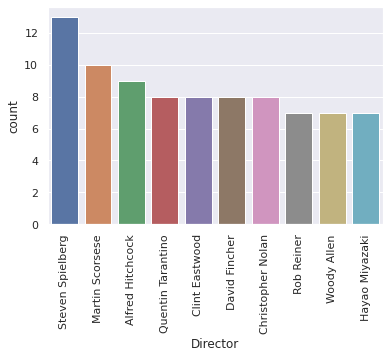

In [73]:
ax = sns.countplot(x = 'Director', data = imdb, order = GrossDir.index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

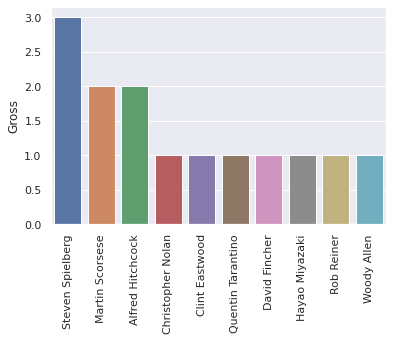

In [74]:
ax = sns.barplot(x = imdb['Director'].value_counts().index[: 10], y = imdb['Gross'].value_counts()[: 10])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

In [75]:
top_voted = imdb.sort_values(['No_of_Votes'], ascending = False)
top_voted[['Series_Title', 'No_of_Votes']][ :10]

,Series_Title,No_of_Votes
0,The Shawshank Redemption,2343110
2,The Dark Knight,2303232
8,Inception,2067042
9,Fight Club,1854740
6,Pulp Fiction,1826188
11,Forrest Gump,1809221
14,The Matrix,1676426
10,The Lord of the Rings: The Fellowship of the Ring,1661481
5,The Lord of the Rings: The Return of the King,1642758
1,The Godfather,1620367


[Text(0, 0, 'The Shawshank Redemption'),
 Text(1, 0, 'The Dark Knight'),
 Text(2, 0, 'Inception'),
 Text(3, 0, 'Fight Club'),
 Text(4, 0, 'Pulp Fiction'),
 Text(5, 0, 'Forrest Gump'),
 Text(6, 0, 'The Matrix'),
 Text(7, 0, 'The Lord of the Rings: The Fellowship of the Ring'),
 Text(8, 0, 'The Lord of the Rings: The Return of the King'),
 Text(9, 0, 'The Godfather')]

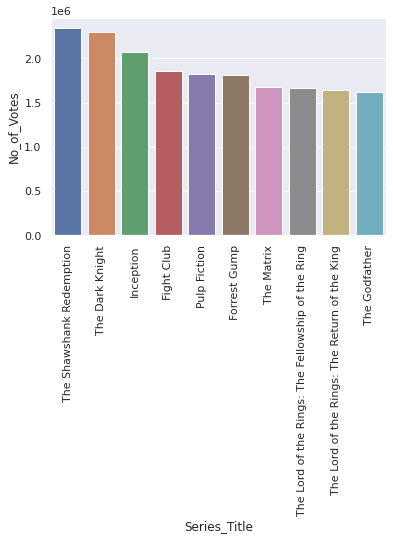

In [76]:
ax = sns.barplot(x = top_voted['Series_Title'][: 10], y = top_voted['No_of_Votes'][: 10])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

[Text(0, 0, 'The Shawshank Redemption'),
 Text(1, 0, 'The Dark Knight'),
 Text(2, 0, 'Inception'),
 Text(3, 0, 'Fight Club'),
 Text(4, 0, 'Pulp Fiction'),
 Text(5, 0, 'Forrest Gump'),
 Text(6, 0, 'The Matrix'),
 Text(7, 0, 'The Lord of the Rings: The Fellowship of the Ring'),
 Text(8, 0, 'The Lord of the Rings: The Return of the King'),
 Text(9, 0, 'The Godfather')]

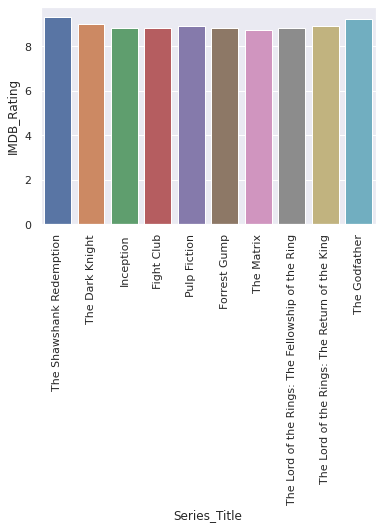

In [77]:
ax = sns.barplot(x = top_voted['Series_Title'][:10], y = top_voted['IMDB_Rating'][: 10])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

[Text(0, 0, 'The Shawshank Redemption'),
 Text(1, 0, 'The Dark Knight'),
 Text(2, 0, 'Inception'),
 Text(3, 0, 'Fight Club'),
 Text(4, 0, 'Pulp Fiction'),
 Text(5, 0, 'Forrest Gump'),
 Text(6, 0, 'The Matrix'),
 Text(7, 0, 'The Lord of the Rings: The Fellowship of the Ring'),
 Text(8, 0, 'The Lord of the Rings: The Return of the King'),
 Text(9, 0, 'The Godfather')]

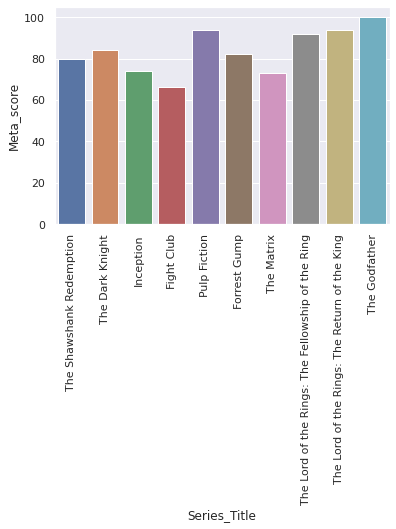

In [78]:
ax = sns.barplot(x = top_voted['Series_Title'][:10], y = top_voted['Meta_score'][:10])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

In [79]:
imdb['Gross'] = imdb['Gross'].str.replace(',', '')
print(imdb['Gross'].head(1))
imdb['Gross'] = imdb['Gross'].astype('float64')
print(imdb['Gross'].head(1))

0    28341469
Name: Gross, dtype: object
0    28341469.0
Name: Gross, dtype: float64


In [80]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 997
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    714 non-null    object 
 1   Series_Title   714 non-null    object 
 2   Released_Year  714 non-null    object 
 3   Certificate    714 non-null    object 
 4   Runtime        714 non-null    object 
 5   Genre          714 non-null    object 
 6   IMDB_Rating    714 non-null    float64
 7   Overview       714 non-null    object 
 8   Meta_score     714 non-null    float64
 9   Director       714 non-null    object 
 10  Star1          714 non-null    object 
 11  Star2          714 non-null    object 
 12  Star3          714 non-null    object 
 13  Star4          714 non-null    object 
 14  No_of_Votes    714 non-null    int64  
 15  Gross          714 non-null    float64
dtypes: float64(3), int64(1), object(12)
memory usage: 111.0+ KB


[Text(0, 0, 'Star Wars: Episode VII - The Force Awakens'),
 Text(1, 0, 'Avengers: Endgame'),
 Text(2, 0, 'Avatar'),
 Text(3, 0, 'Avengers: Infinity War'),
 Text(4, 0, 'Titanic'),
 Text(5, 0, 'The Avengers'),
 Text(6, 0, 'Incredibles 2'),
 Text(7, 0, 'The Dark Knight'),
 Text(8, 0, 'Rogue One'),
 Text(9, 0, 'The Dark Knight Rises')]

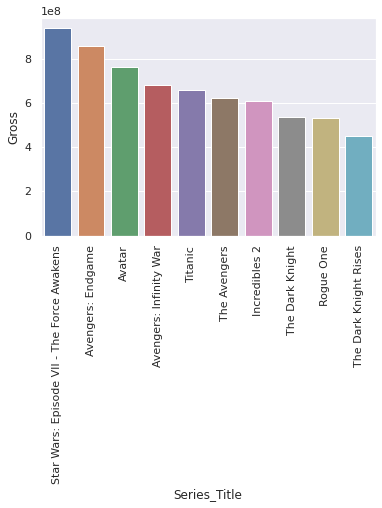

In [81]:
highest_earning = imdb.sort_values(['Gross'], ascending = False)
ax = sns.barplot(x = highest_earning['Series_Title'][: 10], y = highest_earning['Gross'][: 10])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

[Text(0, 0, 'Steven Spielberg'),
 Text(1, 0, 'Martin Scorsese'),
 Text(2, 0, 'Alfred Hitchcock'),
 Text(3, 0, 'Christopher Nolan'),
 Text(4, 0, 'Clint Eastwood'),
 Text(5, 0, 'Quentin Tarantino'),
 Text(6, 0, 'David Fincher'),
 Text(7, 0, 'Hayao Miyazaki'),
 Text(8, 0, 'Rob Reiner'),
 Text(9, 0, 'Woody Allen')]

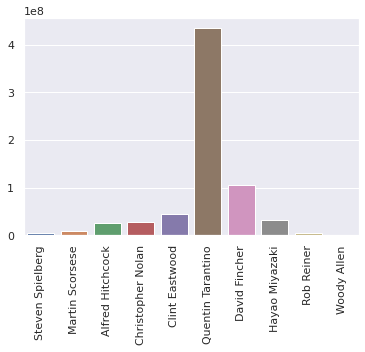

In [82]:
ax = sns.barplot(x = imdb['Director'].value_counts().index[: 10], y = imdb['Gross'].value_counts().index[: 10])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

[Text(0, 0, 'Daisy Ridley'),
 Text(1, 0, 'Joe Russo'),
 Text(2, 0, 'Sam Worthington'),
 Text(3, 0, 'Leonardo DiCaprio'),
 Text(4, 0, 'Robert Downey Jr.'),
 Text(5, 0, 'Craig T. Nelson'),
 Text(6, 0, 'Christian Bale'),
 Text(7, 0, 'Felicity Jones')]

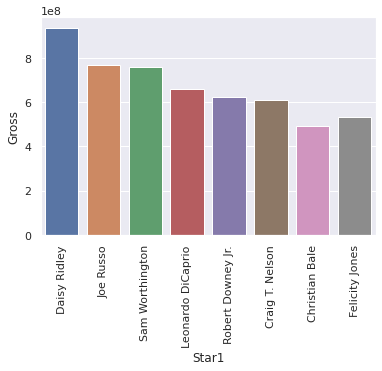

In [83]:
ax = sns.barplot(x = highest_earning['Star1'][: 10], y = highest_earning['Gross'][: 10], ci = None)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

[Text(0, 0, 'John Boyega'),
 Text(1, 0, 'Robert Downey Jr.'),
 Text(2, 0, 'Zoe Saldana'),
 Text(3, 0, 'Kate Winslet'),
 Text(4, 0, 'Chris Evans'),
 Text(5, 0, 'Holly Hunter'),
 Text(6, 0, 'Heath Ledger'),
 Text(7, 0, 'Diego Luna'),
 Text(8, 0, 'Tom Hardy')]

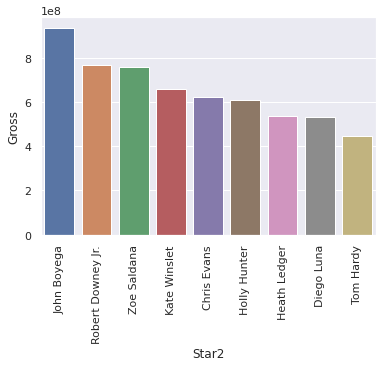

In [84]:
ax = sns.barplot(x = highest_earning['Star2'][:10], y = highest_earning['Gross'][: 10], ci = None)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

In [85]:
top_rated = imdb.sort_values(['IMDB_Rating'], ascending = False)

[Text(0, 0, 'Tim Robbins'),
 Text(1, 0, 'Marlon Brando'),
 Text(2, 0, 'Christian Bale'),
 Text(3, 0, 'Al Pacino'),
 Text(4, 0, 'Henry Fonda'),
 Text(5, 0, 'Elijah Wood'),
 Text(6, 0, 'John Travolta'),
 Text(7, 0, 'Liam Neeson'),
 Text(8, 0, 'Clint Eastwood')]

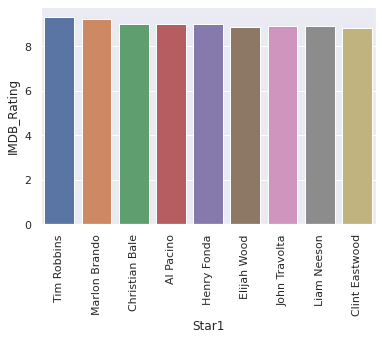

In [86]:
ax = sns.barplot(x = top_rated['Star1'][: 10], y = top_rated['IMDB_Rating'][: 10], ci = None)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

[Text(0, 0, 'Morgan Freeman'),
 Text(1, 0, 'Al Pacino'),
 Text(2, 0, 'Heath Ledger'),
 Text(3, 0, 'Robert De Niro'),
 Text(4, 0, 'Lee J. Cobb'),
 Text(5, 0, 'Viggo Mortensen'),
 Text(6, 0, 'Uma Thurman'),
 Text(7, 0, 'Ralph Fiennes'),
 Text(8, 0, 'Ian McKellen'),
 Text(9, 0, 'Eli Wallach')]

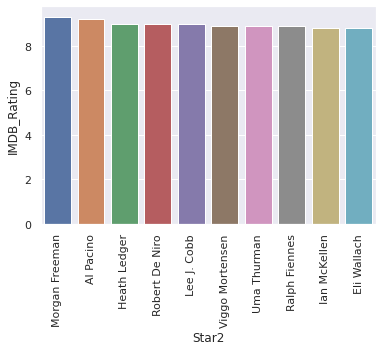

In [87]:
ax = sns.barplot(x = top_rated['Star2'][: 10], y = top_rated['IMDB_Rating'][: 10])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

In [88]:
highest_earning[: 10]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
477,https://m.media-amazon.com/images/M/MV5BOTAzOD...,Star Wars: Episode VII - The Force Awakens,2015,U,138 min,"Action, Adventure, Sci-Fi",7.9,"As a new threat to the galaxy rises, Rey, a de...",80.0,J.J. Abrams,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,860823,936662225.0
59,https://m.media-amazon.com/images/M/MV5BMTc5MD...,Avengers: Endgame,2019,UA,181 min,"Action, Adventure, Drama",8.4,After the devastating events of Avengers: Infi...,78.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Evans,Mark Ruffalo,809955,858373000.0
623,https://m.media-amazon.com/images/M/MV5BMTYwOT...,Avatar,2009,UA,162 min,"Action, Adventure, Fantasy",7.8,A paraplegic Marine dispatched to the moon Pan...,83.0,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez,1118998,760507625.0
60,https://m.media-amazon.com/images/M/MV5BMjMxNj...,Avengers: Infinity War,2018,UA,149 min,"Action, Adventure, Sci-Fi",8.4,The Avengers and their allies must be willing ...,68.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,834477,678815482.0
652,https://m.media-amazon.com/images/M/MV5BMDdmZG...,Titanic,1997,UA,194 min,"Drama, Romance",7.8,A seventeen-year-old aristocrat falls in love ...,75.0,James Cameron,Leonardo DiCaprio,Kate Winslet,Billy Zane,Kathy Bates,1046089,659325379.0
357,https://m.media-amazon.com/images/M/MV5BNDYxNj...,The Avengers,2012,UA,143 min,"Action, Adventure, Sci-Fi",8.0,Earth's mightiest heroes must come together an...,69.0,Joss Whedon,Robert Downey Jr.,Chris Evans,Scarlett Johansson,Jeremy Renner,1260806,623279547.0
891,https://m.media-amazon.com/images/M/MV5BMTEzNz...,Incredibles 2,2018,UA,118 min,"Animation, Action, Adventure",7.6,The Incredibles family takes on a new mission ...,80.0,Brad Bird,Craig T. Nelson,Holly Hunter,Sarah Vowell,Huck Milner,250057,608581744.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
582,https://m.media-amazon.com/images/M/MV5BMjEwMz...,Rogue One,2016,UA,133 min,"Action, Adventure, Sci-Fi",7.8,The daughter of an Imperial scientist joins th...,65.0,Gareth Edwards,Felicity Jones,Diego Luna,Alan Tudyk,Donnie Yen,556608,532177324.0
63,https://m.media-amazon.com/images/M/MV5BMTk4OD...,The Dark Knight Rises,2012,UA,164 min,"Action, Adventure",8.4,Eight years after the Joker's reign of anarchy...,78.0,Christopher Nolan,Christian Bale,Tom Hardy,Anne Hathaway,Gary Oldman,1516346,448139099.0


In [89]:
highest_earning[['Series_Title', 'Gross']][: 10] 

,Series_Title,Gross
477,Star Wars: Episode VII - The Force Awakens,936662225.0
59,Avengers: Endgame,858373000.0
623,Avatar,760507625.0
60,Avengers: Infinity War,678815482.0
652,Titanic,659325379.0
357,The Avengers,623279547.0
891,Incredibles 2,608581744.0
2,The Dark Knight,534858444.0
582,Rogue One,532177324.0
63,The Dark Knight Rises,448139099.0


[Text(0, 0, ' Drama'),
 Text(1, 0, 'Drama'),
 Text(2, 0, 'Action'),
 Text(3, 0, ' Adventure'),
 Text(4, 0, 'Comedy'),
 Text(5, 0, ' Thriller'),
 Text(6, 0, ' Romance'),
 Text(7, 0, 'Crime'),
 Text(8, 0, 'Biography'),
 Text(9, 0, ' Crime')]

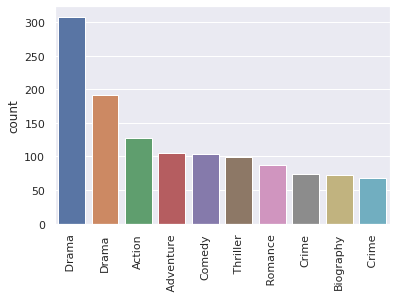

In [90]:
Genre = imdb['Genre'].str.split(',', expand = True).stack().reset_index(level = 1, drop = True)
ax = sns.countplot(x = Genre, order = Genre.value_counts().index[: 10])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

In [91]:
top_voted[['Series_Title', 'Gross']][: 10]

,Series_Title,Gross
0,The Shawshank Redemption,"28,341,469"
2,The Dark Knight,"534,858,444"
8,Inception,"292,576,195"
9,Fight Club,"37,030,102"
6,Pulp Fiction,"107,928,762"
11,Forrest Gump,"330,252,182"
14,The Matrix,"171,479,930"
10,The Lord of the Rings: The Fellowship of the Ring,"315,544,750"
5,The Lord of the Rings: The Return of the King,"377,845,905"
1,The Godfather,"134,966,411"
